In [2]:
import pandas as pd
import numpy as np
import itertools as it

import pickle as pcl

from scipy.spatial.distance import cdist

import math

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.cm as cm

from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

from palettable.tableau import GreenOrange_12
cmap = GreenOrange_12.hex_colors

from collections import Counter

from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import MeanShift

In [3]:
import hightolowz

from protocluster_completeness_purity import cluster_stats

In [69]:
directory = '/lustre/scratch/astro/cl478/protoclusters_data/'
out_directory = 'output/'

In [5]:
# epsilon = 0.1
c = 2.97 * 10**8 # m s^-1

In [6]:
gals_z9p72_sfr = pd.read_csv(directory+'henriques2015a_z9p72_sfr_r200.csv',skiprows=122, skipfooter=1, engine='python')
gals_z8p93_sfr = pd.read_csv(directory+'henriques2015a_z8p93_sfr_r200.csv',skiprows=122, skipfooter=1, engine='python')
gals_z8p22_sfr = pd.read_csv(directory+'henriques2015a_z8p22_sfr_r200.csv',skiprows=122, skipfooter=1, engine='python')
gals_z6p97_sfr = pd.read_csv(directory+'henriques2015a_z6p97_sfr_r200.csv',skiprows=122, skipfooter=1, engine='python')

gals_z5p92_sfr = pd.read_csv(directory+'henriques2015a_z5p92_sfr_r200.csv',skiprows=122, skipfooter=1, engine='python')
gals_z5p03_sfr = pd.read_csv(directory+'henriques2015a_z5p03_sfr_r200.csv',skiprows=122, skipfooter=1, engine='python')
gals_z3p95_sfr = pd.read_csv(directory+'henriques2015a_z3p95_sfr_r200.csv',skiprows=122, skipfooter=1, engine='python')
gals_z3p10_sfr = pd.read_csv(directory+'henriques2015a_z3p10_sfr_r200.csv',skiprows=122, skipfooter=1, engine='python')
gals_z2p07_sfr = pd.read_csv(directory+'henriques2015a_z2p07_sfr_r200.csv',skiprows=122, skipfooter=1, engine='python')

In [9]:
gals_z9p72_mstar = pd.read_csv(directory+'henriques2015a_z9p72_stellarMass_r200.csv', skiprows=122, skipfooter=1, engine='python')
gals_z8p93_mstar = pd.read_csv(directory+'henriques2015a_z8p93_stellarMass_r200.csv', skiprows=122, skipfooter=1, engine='python')
gals_z8p22_mstar = pd.read_csv(directory+'henriques2015a_z8p22_stellarMass_r200.csv', skiprows=122, skipfooter=1, engine='python')
gals_z6p97_mstar = pd.read_csv(directory+'henriques2015a_z6p97_stellarMass_r200.csv', skiprows=122, skipfooter=1, engine='python')

gals_z5p92_mstar = pd.read_csv(directory+'henriques2015a_z5p92_stellarMass_r200.csv', skiprows=122, skipfooter=1, engine='python')
gals_z5p03_mstar = pd.read_csv(directory+'henriques2015a_z5p03_stellarMass_r200.csv', skiprows=122, skipfooter=1, engine='python')
gals_z3p95_mstar = pd.read_csv(directory+'henriques2015a_z3p95_stellarMass_r200.csv', skiprows=122, skipfooter=1, engine='python')
gals_z3p10_mstar = pd.read_csv(directory+'henriques2015a_z3p10_stellarMass_r200.csv', skiprows=122, skipfooter=1, engine='python')
gals_z2p07_mstar = pd.read_csv(directory+'henriques2015a_z2p07_stellarMass_r200.csv', skiprows=122, skipfooter=1, engine='python')

In [71]:
frac_mstar = []
size_mstar = []
pcs_mstar = []
field_mstar = []

frac_mstar_10 = []
size_mstar10 = []
pcs_mstar10 = []
field_mstar10 = []

for gals in [gals_z2p07_mstar, gals_z3p10_mstar, gals_z3p95_mstar,
             gals_z5p03_mstar, gals_z5p92_mstar, gals_z6p97_mstar,
             gals_z8p22_mstar, gals_z8p93_mstar, gals_z9p72_mstar]:

    pc_mask = gals['z0_central_mcrit200'] >= 1e4
    mass_mask = gals['zn_stellarMass'] > 1
    
    size_mstar.append(gals.shape[0])
    size_mstar10.append(gals[mass_mask].shape[0])
    
    field_mstar.append(gals[~pc_mask].shape[0])
    field_mstar10.append(gals[(~pc_mask) & mass_mask].shape[0])
    
    pcs_mstar.append(gals[pc_mask].shape[0])
    pcs_mstar10.append(gals[pc_mask & mass_mask].shape[0])
    
    frac_mstar.append(float(gals[pc_mask].shape[0]) / gals.shape[0])
    
    if gals[mass_mask].shape[0] > 0:
        frac_mstar_10.append(float(gals[pc_mask & mass_mask].shape[0]) / gals[mass_mask].shape[0])
    else:
        frac_mstar_10.append(np.nan)
        

In [73]:
frac_sfr = []
size_sfr = []
pcs_sfr = []
field_sfr = []

frac_sfr5 = []
size_sfr5 = []
pcs_sfr5 = []
field_sfr5 = []

for gals in [gals_z2p07_sfr, gals_z3p10_sfr, gals_z3p95_sfr, 
             gals_z5p03_sfr, gals_z5p92_sfr, gals_z6p97_sfr,
             gals_z8p22_sfr, gals_z8p93_sfr, gals_z9p72_sfr]:
    
    pc_mask = gals['z0_central_mcrit200'] >= 1e4
    sfr_mask = gals['zn_sfr'] > 5

    size_sfr.append(gals.shape[0])
    size_sfr5.append(gals[sfr_mask].shape[0])
    
    field_sfr.append(gals[~pc_mask].shape[0])
    field_sfr5.append(gals[(~pc_mask) & sfr_mask].shape[0])
    
    pcs_sfr.append(gals[pc_mask].shape[0])
    pcs_sfr5.append(gals[pc_mask & sfr_mask].shape[0])
    
    frac_sfr.append(float(gals[pc_mask].shape[0]) / gals.shape[0])
    frac_sfr5.append(float(gals[pc_mask & sfr_mask].shape[0]) / gals[sfr_mask].shape[0])
    

In [67]:
from astropy.cosmology import Planck13, z_at_value
import astropy.units as u

ages = np.array([3, 2, 1.4, 1.1, 0.9, 0.8, 0.7, 0.6, 0.5])*u.Gyr

ageticks = [z_at_value(Planck13.age, age) for age in ages]

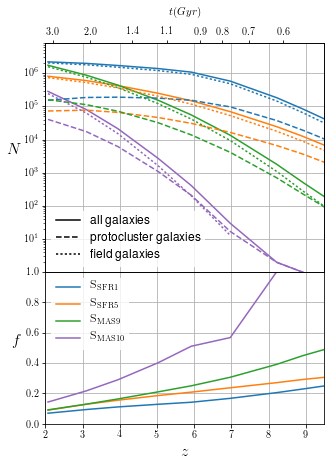

In [76]:
fig = plt.figure(figsize=(5, 7))

gs = gridspec.GridSpec(5, 1)

gs.update(hspace=0) # bottom = 0.57, top = 1, , wspace=0

ax1 = fig.add_subplot(gs[0:3,0])
ax2 = fig.add_subplot(gs[3:5,0])

z = [2.07, 3.10, 3.95, 5.03, 5.92, 6.97, 8.22, 8.93, 9.72]

# Plot 1
ax1.semilogy(z, size_sfr, color='C0')
ax1.semilogy(z, size_sfr5, color='C1')
ax1.semilogy(z, size_mstar, color='C2')
ax1.semilogy(z, size_mstar10, color='C4')

ax1.semilogy(z, pcs_sfr, linestyle='dashed', color='C0')
ax1.semilogy(z, pcs_sfr5, linestyle='dashed', color='C1')
ax1.semilogy(z, pcs_mstar, linestyle='dashed', color='C2')
ax1.semilogy(z, pcs_mstar10, linestyle='dashed', color='C4')

ax1.semilogy(z, field_sfr, linestyle='dotted', color='C0')
ax1.semilogy(z, field_sfr5, linestyle='dotted', color='C1')
ax1.semilogy(z, field_mstar, linestyle='dotted', color='C2')
ax1.semilogy(z, field_mstar10, linestyle='dotted', color='C4')

ax1.set_xticklabels([])
ax1.set_ylim(1.05, 8e6)

# Plot 2
ax2.plot(z, frac_sfr, color='C0')
ax2.plot(z, frac_sfr5, color='C1')
ax2.plot(z, frac_mstar, color='C2')
ax2.plot(z, frac_mstar_10, color='C4')

# labels
ax2.set_ylabel('$f$', rotation=0, size=16, labelpad=10)
ax1.set_ylabel('$N$', rotation=0, size=16, labelpad=11)
ax2.set_xlabel('$z$', size=16)


# legends
line1 = plt.Line2D((0,1),(0,0), color='black', linestyle='solid')
line2 = plt.Line2D((0,1),(0,0), color='black', linestyle='dashed')
line3 = plt.Line2D((0,1),(0,0), color='black', linestyle='dotted')

legend = ax1.legend(handles=[line1, line2, line3], labels=['all galaxies','protocluster galaxies','field galaxies'], 
                    loc=3, prop={'size':12})

legend.get_frame().set_facecolor('white')
legend.get_frame().set_edgecolor('white')

line_sfr = plt.Line2D((0,1),(0,0), color='C0', linestyle='solid')
line_sfr5 = plt.Line2D((0,1),(0,0), color='C1', linestyle='solid')
line_mstar = plt.Line2D((0,1),(0,0), color='C2', linestyle='solid')
line_mstar10 = plt.Line2D((0,1),(0,0), color='C4', linestyle='solid')

legend = ax2.legend(handles=[line_sfr, line_sfr5, line_mstar, line_mstar10],
           labels=['$\mathrm{S}_{\mathrm{SFR1}}$', '$\mathrm{S}_{\mathrm{SFR5}}$',
                   '$\mathrm{S}_{\mathrm{MAS9}}$','$\mathrm{S}_{\mathrm{MAS10}}$'], 
                    loc=2, prop={'size':12})

legend.get_frame().set_facecolor('white')
legend.get_frame().set_edgecolor('white')


# twin x axis
axt = ax1.twiny()
axt.set_xticks(ageticks)
axt.set_xticklabels(["$%.1f$"%age for age in ages.value]);

axt.set_xlabel('$t (Gyr)$', size=11, labelpad=12)

# ax1.set_xticklabels([])

ax1.set_xlim(2,9.5)
ax2.set_xlim(2,9.5)
axt.set_xlim(2,9.5)

ax2.set_ylim(0, 1)

for ax in [ax1, ax2]:
    ax.grid()
    

# plt.savefig(out_directory+'pc_fractions.png', bbox_inches='tight', dpi=300)